In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import io, time, json
import requests
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd

url = "https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD"
los_crime_df = pd.read_csv(url)

# Show the first few rows of the DataFrame
print(los_crime_df.head())


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350     13   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45     14   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515     13   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150      6   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100      1   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc  ... Status  \
0                           VIOLATION OF COURT ORDER  ...     AA   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
2                         

In [ ]:
# check the data
chicago_crime_df = pd.read_csv('ChicagoCrimes.csv')
print(chicago_crime_df.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [ ]:
# we see that the column names 'Crm Cd Desc' and 'Premis Desc'
# is confusing so we rename them to their equivalent
los_crime_df = los_crime_df.rename(columns={
    'Crm Cd Desc': 'Primary Type',
    'Premis Desc': 'Location Description'
})
los_crime_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Primary Type,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [ ]:
def describe(df):
    '''
    Give some preliminary observation on the given dataframe:
    - Size and data type
    - NaN count each column
    - Value count each column
    '''
    print('**************************')
    print('*** Size and data type')
    size = len(df)
    print(f'Size: {df.size}')
    print(df.dtypes)
    print('**************************')
    print('*** NaN count each column')
    nan_df = df.isna().sum().to_frame(name='count')
    nan_df['percent'] = nan_df['count'] / size * 100
    print(nan_df)
    for col in df:
        print('**************************')
        print(f'*** Value count of {col}')
        val_df = df[col].value_counts().to_frame(name='count')
        val_df['percent'] = val_df['count'] / size * 100
        print(val_df)

In [ ]:
describe(chicago_crime_df)

**************************
*** Size and data type
Size: 170837238
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
**************************
*** NaN count each column
                       count   percent
ID                         0  0.000000
Case Number                4  0.000052
Date                       0  0.000000
Block  

In [ ]:
# column Location Description has very few row with NaN value
# we can drop that
chicago_crime_df = chicago_crime_df[~chicago_crime_df['Location Description'].isna()]
describe(chicago_crime_df)

**************************
*** Size and data type
Size: 170611760
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
**************************
*** NaN count each column
                       count   percent
ID                         0  0.000000
Case Number                4  0.000052
Date                       0  0.000000
Block  

In [ ]:
describe(los_crime_df)


**************************
*** Size and data type
Size: 124512
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Primary Type              0      0.0
Location Description      0      0.0
**************************
*** Value count of Primary Type
                                                    count    percent
BATTERY - SIMPLE ASSAULT                             7097  11.399704
VEHICLE - STOLEN                                     5274   8.471473
BURGLARY FROM VEHICLE                                5108   8.204832
BURGLARY                                             4181   6.715819
THEFT PLAIN - PETTY ($950 & UNDER)                   3890   6.248394
...                                                   ...        ...
THEFT, COIN MACHINE - PETTY ($950 & UNDER)              1   0.001606
PURSE SNATCHING - ATTEMPT                               1   0.001606
DRUNK ROLL - ATTE

In [ ]:
# Convert the 'Date' column to datetime format
chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'])

# Create a boolean mask to filter for data from 2010-2019 in Chicago
chicago_mask = (chicago_crime_df['Date'].dt.year >= 2010) & (chicago_crime_df['Date'].dt.year <= 2019)

# Apply the boolean mask to the DataFrame to filter the data
chicago_crime_df = chicago_crime_df.loc[chicago_mask]

# Print the resulting DataFrame
print(chicago_crime_df)

               ID Case Number                Date                  Block  \
0        10224738    HY411648 2015-09-05 13:30:00        043XX S WOOD ST   
1        10224739    HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE   
2        11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE   
3        10224740    HY411595 2015-09-05 12:45:00      035XX W BARRY AVE   
4        10224741    HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE   
...           ...         ...                 ...                    ...   
7762260  12728489    JF277971 2019-05-12 14:44:00     054XX S SEELEY AVE   
7765206  12836852    JF407549 2019-05-03 12:30:00      017XX W PRYOR AVE   
7765212  12837232    JF408140 2017-03-16 00:00:00      025XX N MANGO AVE   
7765218  12837164    JF408066 2019-05-01 00:00:00        047XX W 82ND PL   
7765319  12847440    JF415270 2016-01-01 00:00:00      014XX S DRAKE AVE   

         IUCR                Primary Type  \
0        0486                     BATTERY 

In [ ]:
# Create a dictionary with the GDP data
chicago_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
            'GDP (billions of current dollars)': [591.4, 619.4, 642.9, 670.6, 699.6, 723.7, 734.9, 764.4, 795.2, 825.4]}

# Create a pandas DataFrame from the dictionary
chicago_GDP = pd.DataFrame(chicago_GDP)

# Print the resulting DataFrame
print(chicago_GDP)

   Year  GDP (billions of current dollars)
0  2010                              591.4
1  2011                              619.4
2  2012                              642.9
3  2013                              670.6
4  2014                              699.6
5  2015                              723.7
6  2016                              734.9
7  2017                              764.4
8  2018                              795.2
9  2019                              825.4


In [ ]:
# Create a dictionary with the GDP data
LA_GDP = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
            'GDP (billions of current dollars)': [703.8, 728.1, 747.8, 775.0, 805.6, 842.3, 870.8, 908.4, 944.6, 972.1]}

# Create a pandas DataFrame from the dictionary
LA_GDP = pd.DataFrame(LA_GDP)

# Print the resulting DataFrame
print(LA_GDP)

   Year  GDP (billions of current dollars)
0  2010                              703.8
1  2011                              728.1
2  2012                              747.8
3  2013                              775.0
4  2014                              805.6
5  2015                              842.3
6  2016                              870.8
7  2017                              908.4
8  2018                              944.6
9  2019                              972.1


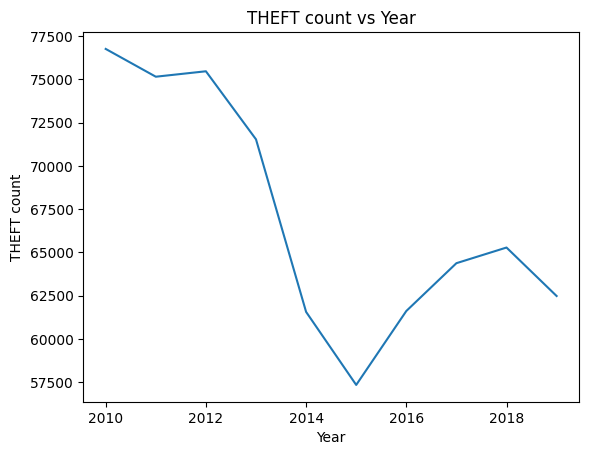

In [ ]:
def plot_by_year(year_type_df, value_name):
    by_year = year_type_df[year_type_df['Primary Type'] == value_name].groupby(['Year']).count()
    plt.plot(by_year)
    plt.title(f'{value_name} count vs Year')
    plt.xlabel('Year')
    plt.ylabel(f'{value_name} count')
    plt.show()

year_type_df = chicago_crime_df[['Year', 'Primary Type']]

# show how much theft happens over time
plot_by_year(year_type_df, 'THEFT')

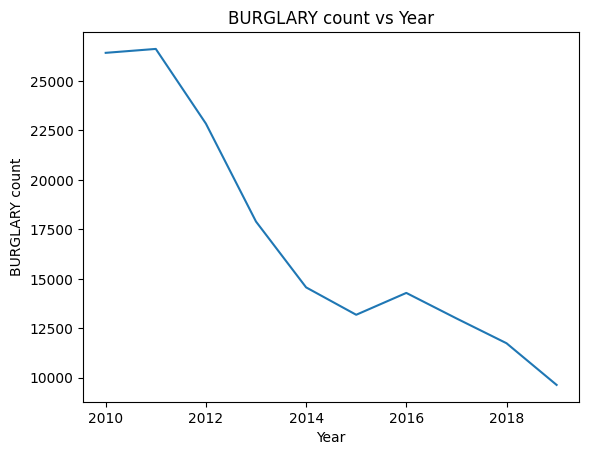

In [ ]:
plot_by_year(year_type_df, 'BURGLARY')


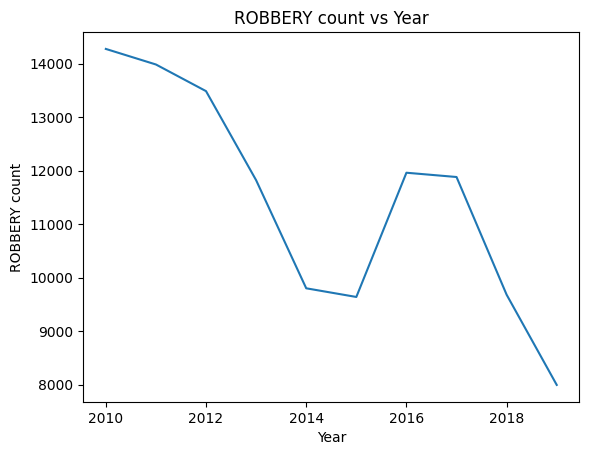

In [ ]:
plot_by_year(year_type_df, 'ROBBERY')


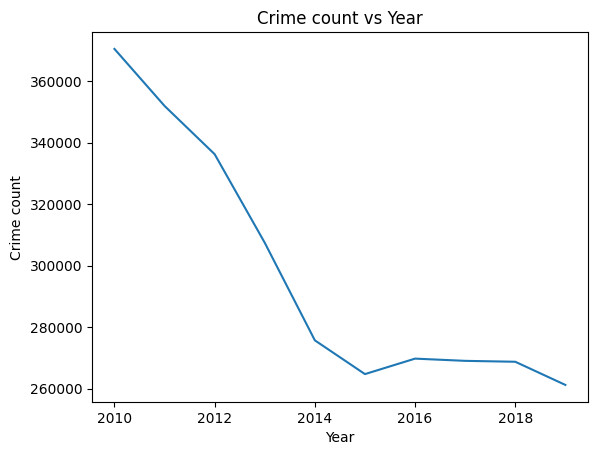

In [ ]:
count_by_year = year_type_df.groupby(['Year']).count()
plt.plot(count_by_year)
plt.title(f'Crime count vs Year')
plt.xlabel('Year')
plt.ylabel(f'Crime count')
plt.show()

In [ ]:
print("Column names in the DataFrame:")
print(chicago_crime_df.columns)

Column names in the DataFrame:
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


## Gradient Boosting Algorithm (Chicago Dataset): 

Mean Squared Error: 11.264018128050774
                                   GDP (billions of current dollars)  \
GDP (billions of current dollars)                           1.000000   
BURGLARY Rate                                              -0.978438   
ROBBERY Rate                                               -0.289190   
THEFT Rate                                                  0.949386   

                                   BURGLARY Rate  ROBBERY Rate  THEFT Rate  
GDP (billions of current dollars)      -0.978438     -0.289190    0.949386  
BURGLARY Rate                           1.000000      0.296554   -0.970558  
ROBBERY Rate                            0.296554      1.000000   -0.517856  
THEFT Rate                             -0.970558     -0.517856    1.000000  


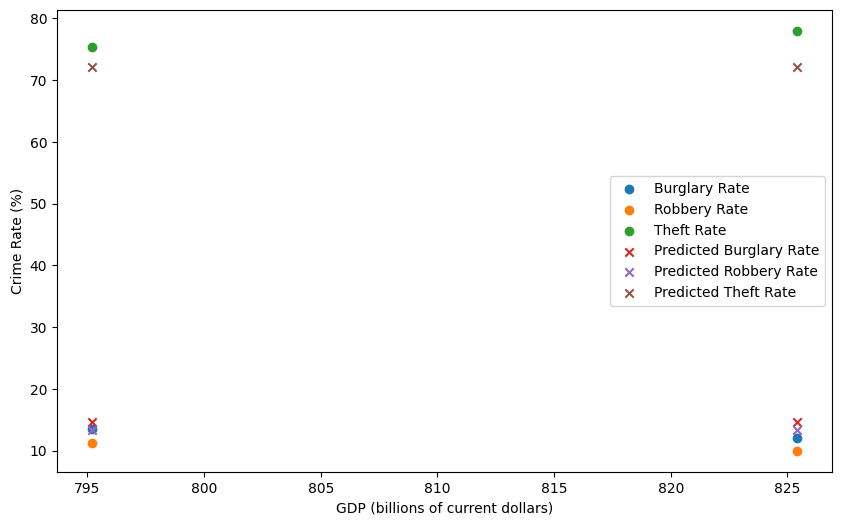

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Assuming chicago_crime_df and chicago_GDP DataFrames are already loaded

# Make a copy of the original DataFrame
chicago_crime_copy = chicago_crime_df.copy()

# Preprocess the data on the copied DataFrame
chicago_crime_copy = chicago_crime_copy.loc[chicago_crime_copy['Year'].between(2010, 2019) & 
                                            chicago_crime_copy['Primary Type'].isin(['BURGLARY', 'ROBBERY', 'THEFT'])]
chicago_crime_copy = chicago_crime_copy.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')
chicago_crime_copy = pd.pivot_table(chicago_crime_copy, values='Count', index=['Year'], columns=['Primary Type']).reset_index()
chicago_crime_copy.columns.name = None

# Compute crime rates as a percentage
chicago_crime_copy['Total'] = chicago_crime_copy[['BURGLARY', 'ROBBERY', 'THEFT']].sum(axis=1)
chicago_crime_copy['BURGLARY Rate'] = chicago_crime_copy['BURGLARY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['ROBBERY Rate'] = chicago_crime_copy['ROBBERY'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy['THEFT Rate'] = chicago_crime_copy['THEFT'] / chicago_crime_copy['Total'] * 100
chicago_crime_copy = chicago_crime_copy[['Year', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']]

# Merge the chicago_GDP DataFrame with the processed chicago_crime_copy DataFrame
merged_df = pd.merge(chicago_GDP, chicago_crime_copy, on='Year')
merged_df = merged_df.dropna()

# Split the data into training and testing sets
train_size = int(merged_df.shape[0] * 0.8)
train_df = merged_df[:train_size]
test_df = merged_df[train_size:]

# Train the Gradient Boosting model
X_train = train_df['GDP (billions of current dollars)'].values.reshape(-1, 1)
y_train = train_df[['BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']].values
X_test = test_df['GDP (billions of current dollars)'].values.reshape(-1, 1)
y_test = test_df[['BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']].values

gb_model = GradientBoostingRegressor()
multioutput_model = MultiOutputRegressor(gb_model)
multioutput_model.fit(X_train, y_train)

# Evaluate the model
y_pred = multioutput_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
gdp_crime_df = merged_df[['GDP (billions of current dollars)', 'BURGLARY Rate', 'ROBBERY Rate', 'THEFT Rate']]
corr_matrix = gdp_crime_df.corr()
print(corr_matrix)
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_test, y_test[:, 0], label='Burglary Rate')
ax.scatter(X_test, y_test[:, 1], label='Robbery Rate')
ax.scatter(X_test, y_test[:, 2], label='Theft Rate')
ax.scatter(X_test, y_pred[:, 0], label='Predicted Burglary Rate', marker='x')
ax.scatter(X_test, y_pred[:, 1], label='Predicted Robbery Rate', marker='x')
ax.scatter(X_test, y_pred[:, 2], label='Predicted Theft Rate', marker='x')
ax.set_xlabel('GDP (billions of current dollars)')
ax.set_ylabel('Crime Rate (%)')
ax.legend()
plt.show()



In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3.3561910148337466


In [ ]:
print("Column names in the DataFrame:")
print(los_crime_df.columns)

Column names in the DataFrame:
Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Primary Type', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Location Description', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'LOCATION', 'Cross Street', 'LAT', 'LON'],
      dtype='object')


## Conclusion of the Gradient Boosting Algorithm: 

_ Chicago Dataset: The correlation matrix shows that there is a strong negative correlation (-0.978) between GDP and the burglary rate, a moderate negative correlation (-0.289) between GDP and the robbery rate, and a strong positive correlation (0.949) between GDP and the theft rate. These results suggest that as GDP increases, the burglary rate tends to decrease, while the theft rate tends to increase. The correlation between GDP and the robbery rate is not as strong, suggesting that other factors may play a larger role in determining the incidence of robbery.